# Introduction

- Keras comes bundled with the Fashion MNIST dataset.
- It contains 28 x 28 grayscale images with 10 categories. For example 0 T-shirt/top, 1 trouser, 2 pullover...9 ankle boot.
- There are 60,000 training samples and 10,000 testing samples

In [1]:
from tensorflow.keras.datasets import fashion_mnist

In [2]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

In [5]:
target_translation = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}

## Visualizing the data

In [6]:
%matplotlib inline

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
import numpy as np

index = np.random.choice(np.arange(len(X_train)), 24, replace=False)
index

array([59530, 31591,  7216, 32172, 42309, 50990, 39632, 14961, 47930,
       53381,  8113, 14236, 39887, 41057, 21692, 30540, 46072,  2398,
       30781, 15471, 31494, 16691, 17442, 20116])

In [9]:
y_train[0]

9

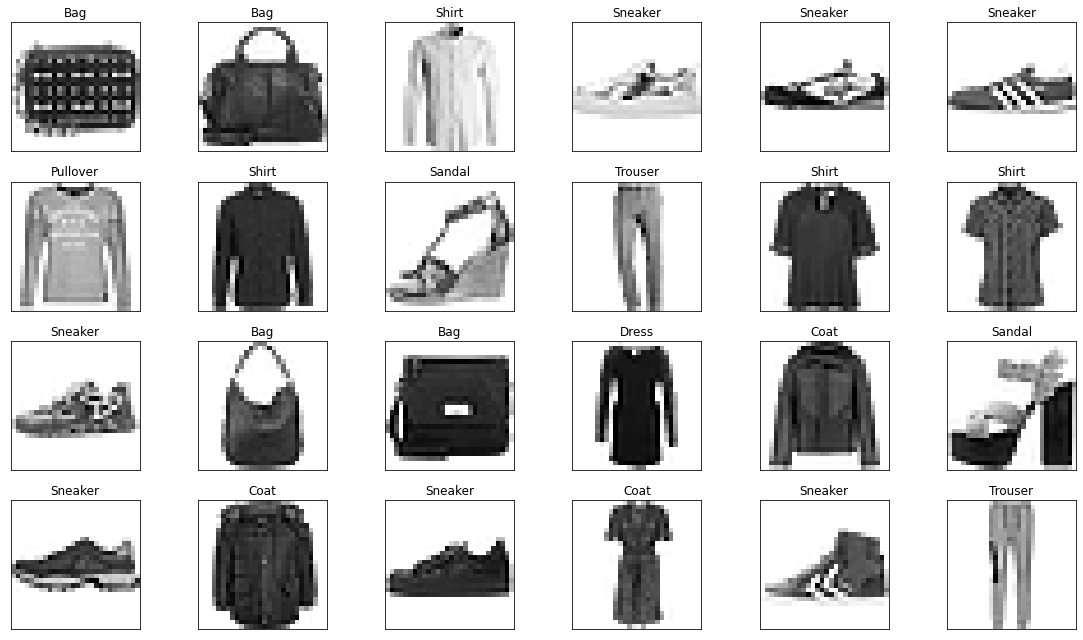

In [10]:
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16,9))
for item in zip(axes.ravel(), X_train[index], y_train[index]):
  axes, image, target = item
  axes.imshow(image, cmap=plt.cm.gray_r)
  axes.set_xticks([])
  axes.set_yticks([])
  axes.set_title(target_translation[target])
plt.tight_layout()

# Reshaping the data

- Each sample must have the height, width and channels

In [11]:
X_train = X_train.reshape((60000, 28, 28, 1))

In [12]:
X_train.shape

(60000, 28, 28, 1)

In [13]:
X_test = X_test.reshape((10000, 28, 28, 1))

# Normalizing the data

- To reduce the effect of values outsite of the range 0 - 1.0 we divide by 255

In [14]:
X_train = X_train.astype('float32')/255

In [15]:
X_test = X_test.astype('float32')/255

# Convert the labels to categorical data

In [16]:
from tensorflow.keras.utils import to_categorical

In [17]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [18]:
y_test.shape

(10000,)

In [19]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [20]:
y_train.shape

(60000,)

In [21]:
y_test = to_categorical(y_test)

In [22]:
y_test.shape

(10000, 10)

In [23]:
y_test

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [24]:
y_train[0]

9

In [25]:
y_train = to_categorical(y_train)

In [26]:
y_train

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

# Creating the neural network

In [27]:
from tensorflow.keras.models import Sequential

In [28]:
cnn = Sequential()

In [29]:
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D

In [30]:
# add the convolution layer
cnn.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=(28, 28, 1)))

In [31]:
# add a pooling layer
cnn.add(MaxPooling2D(pool_size=(2,2)))

In [32]:
cnn.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))

In [33]:
cnn.add(MaxPooling2D(pool_size=(2,2)))

In [34]:
# flatten the results
cnn.add(Flatten())

In [35]:
# Add the dense layer to learn the relationships among features
cnn.add(Dense(units=128, activation='relu'))

In [36]:
# Add another dense layer which outputs into neurons classification probabilities
cnn.add(Dense(units=10, activation='softmax'))

In [37]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 3200)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               409728    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

# Visualizing the model's structure

In [38]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image

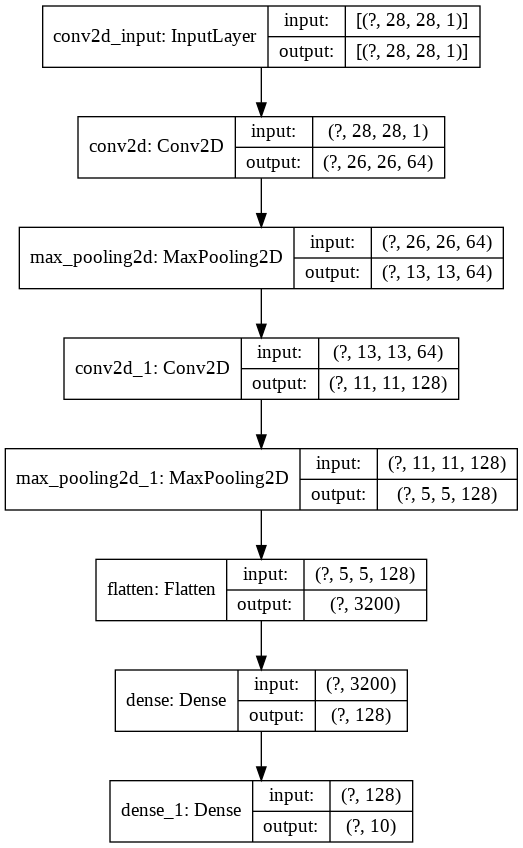

In [39]:
plot_model(cnn, to_file='fashion_convnet.png', show_shapes=True, show_layer_names=True)
Image(filename='fashion_convnet.png')

In [40]:
# compile the model
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Training the model

In [41]:
cnn.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.1)

Epoch 1/10
844/844 [==============================] - 105s 124ms/step - loss: 0.4642 - accuracy: 0.8315 - val_loss: 0.3482 - val_accuracy: 0.8748
Epoch 2/10
844/844 [==============================] - 104s 123ms/step - loss: 0.3060 - accuracy: 0.8892 - val_loss: 0.3141 - val_accuracy: 0.8867
Epoch 3/10
844/844 [==============================] - 104s 123ms/step - loss: 0.2593 - accuracy: 0.9044 - val_loss: 0.2677 - val_accuracy: 0.9030
Epoch 4/10
844/844 [==============================] - 104s 123ms/step - loss: 0.2241 - accuracy: 0.9170 - val_loss: 0.2840 - val_accuracy: 0.8975
Epoch 5/10
844/844 [==============================] - 109s 129ms/step - loss: 0.1971 - accuracy: 0.9268 - val_loss: 0.2388 - val_accuracy: 0.9145
Epoch 6/10
844/844 [==============================] - 103s 122ms/step - loss: 0.1727 - accuracy: 0.9356 - val_loss: 0.2307 - val_accuracy: 0.9167
Epoch 7/10
844/844 [==============================] - 103s 123ms/step - loss: 0.1511 - accuracy: 0.9437 - val_loss: 0.2373 -

# Evaluating the model

In [42]:
loss, accuracy = cnn.evaluate(X_test, y_test)

313/313 [==============================] - 6s 18ms/step - loss: 0.2873 - accuracy: 0.9111


In [43]:
loss

0.28726258873939514

In [44]:
accuracy

0.9110999703407288

# Making predictions using the `predict` method

In [45]:
predictions = cnn.predict(X_test)

In [46]:
for index, probability in enumerate(predictions[0]):
  print(f'{index}: {probability:.10%}')

0: 0.0000044792%
1: 0.0000012499%
2: 0.0000000479%
3: 0.0000000031%
4: 0.0000000076%
5: 0.0006056781%
6: 0.0000000968%
7: 0.0012219013%
8: 0.0000001564%
9: 99.9981641769%


In [47]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)